In [6]:
pip install MDAnalysis


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import MDAnalysis
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis import msd


In [9]:
run = {'1.5': '10000', '1': '50000',
       '0.9': '150000', '0.8': '150000', 
       '0.7': '180000', '0.65': '350000', 
       '0.6': '1000000', '0.55': '3000000', 
       '0.5': '10000000', '0.475': '30000000', 
       '0.45': '100000000'}
prod_data = dict(zip(run.keys(), [None]*len(run.keys())))
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    prod_data[str(t)] = MDAnalysis.Universe(f"../Data/equil/kalj_T{t}_n360_v300_{run[str(t)]}_1.lammpstrj", 
                                            f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[str(t)]}_1.unwrap.dcd",
                                            topology_format="LAMMPSDUMP")

/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [13]:
def cal_rdf(prod_data):
    type1 = prod_data.select_atoms("type 1")
    type2 = prod_data.select_atoms("type 2")

    rdf_11 = rdf.InterRDF(type1, type1).run()
    rdf_22 = rdf.InterRDF(type2, type2).run()
    rdf_12 = rdf.InterRDF(type1, type2).run()
    return rdf_11, rdf_22, rdf_12

def cal_msd(prod_data):
    type1 = prod_data.select_atoms("type 1")

    msd1 = msd.EinsteinMSD(type1).run()
    return msd1

In [14]:
rdf_dict = {}
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    rdf_dict[t] = cal_rdf(prod_data[str(t)])

/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAna

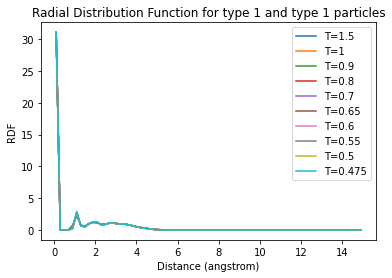

In [15]:
# Now, plot the RDF for particle type 1 and 1
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][0].bins, rdf_dict[t][0].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 1 and type 1 particles')
plt.savefig('../Figures/rdf_1-1.png')
plt.show()

/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAna

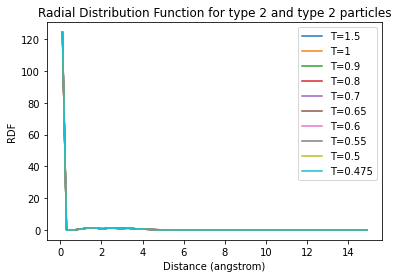

In [16]:
# Now, plot the RDF for particle type 2 and 2
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][1].bins, rdf_dict[t][1].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 2 and type 2 particles')
plt.savefig('../Figures/rdf_2-2.png')
plt.show()

/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAna

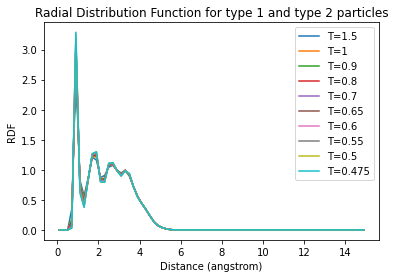

In [17]:
# Now, plot the RDF for particle type 1 and 2
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][2].bins, rdf_dict[t][2].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 1 and type 2 particles')
plt.savefig('../Figures/rdf_1-2.png')
plt.show()

In [23]:
pip install tidynamics

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
msd_dict = {}

for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    lammpstrj_file = f"../Data/equil/kalj_T{t}_n360_v300_{run[str(t)]}_1.lammpstrj"
    dcd_file = f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[str(t)]}_1.unwrap.dcd"
    
    if os.path.exists(lammpstrj_file) and os.path.exists(dcd_file):
        prod_data[str(t)] = MDAnalysis.Universe(lammpstrj_file, dcd_file, topology_format="LAMMPSDUMP")
        msd_dict[t] = cal_msd(prod_data[str(t)])
    else:
        print(f"Error: One or both files do not exist for temperature {t}")

/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/zg2344/.local/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [19]:
for temp, msd_obj in msd_dict.items():
    break
msd_obj.results['msds_by_particle'].mean(axis=1).shape

(501,)

In [20]:
msd_obj.times

array([0.        , 0.00048888, 0.00097776, 0.00146665, 0.00195553,
       0.00244441, 0.00293329, 0.00342217, 0.00391106, 0.00439994,
       0.00488882, 0.0053777 , 0.00586659, 0.00635547, 0.00684435,
       0.00733323, 0.00782211, 0.008311  , 0.00879988, 0.00928876,
       0.00977764, 0.01026652, 0.01075541, 0.01124429, 0.01173317,
       0.01222205, 0.01271094, 0.01319982, 0.0136887 , 0.01417758,
       0.01466646, 0.01515535, 0.01564423, 0.01613311, 0.01662199,
       0.01711087, 0.01759976, 0.01808864, 0.01857752, 0.0190664 ,
       0.01955528, 0.02004417, 0.02053305, 0.02102193, 0.02151081,
       0.0219997 , 0.02248858, 0.02297746, 0.02346634, 0.02395522,
       0.02444411, 0.02493299, 0.02542187, 0.02591075, 0.02639963,
       0.02688852, 0.0273774 , 0.02786628, 0.02835516, 0.02884405,
       0.02933293, 0.02982181, 0.03031069, 0.03079957, 0.03128846,
       0.03177734, 0.03226622, 0.0327551 , 0.03324398, 0.03373287,
       0.03422175, 0.03471063, 0.03519951, 0.03568839, 0.03617

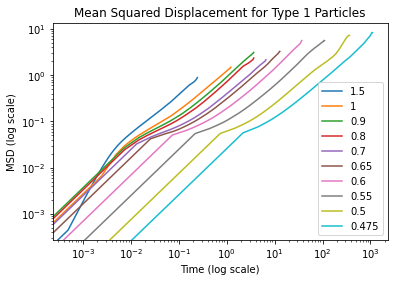

In [21]:
import matplotlib.pyplot as plt
for temp, msd_obj in msd_dict.items():

    # Ensure to use loglog for both axes
    plt.loglog(msd_obj.times,
               msd_obj.run().results['msds_by_particle'].mean(axis=1),
               label=f'{temp}')

plt.xlabel('Time (log scale)')
plt.ylabel('MSD (log scale)')
plt.title('Mean Squared Displacement for Type 1 Particles')
plt.legend()
plt.savefig('../Figures/msd_loglog_plot.png')
plt.show()

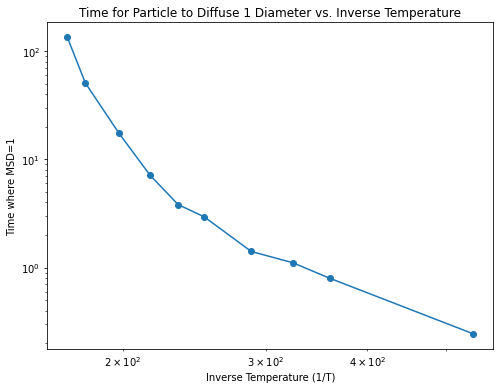

In [22]:
# Function to find the time where MSD first reaches 1
import numpy as np
def find_time_for_msd(msd_obj):
    msd_obj.run()
    # Find the index where the MSD first exceeds 1
    try:
        index = np.where(msd_obj.run().results['msds_by_particle'].mean(axis=1) >= 1)[0][0]
    except:
        index = len(msd_obj.times) - 1
    # Return the time at that index
    return msd_obj.times[index]

times_msd_1 = {}
temperatures = []

for temp_str, msd_obj in msd_dict.items():
    # Extract numerical value of temperature from the string (assuming the format is like '300K')
    temp = temp_str * 360
    temperatures.append(temp)
    
    # Find the time where MSD first reaches 1 and store it
    time = find_time_for_msd(msd_obj)
    times_msd_1[temp_str] = time

# Now let's create the log-log plot
# Convert lists to numpy arrays for easier manipulation
temperatures = np.array(temperatures)
times = np.array(list(times_msd_1.values()))

plt.figure(figsize=(8, 6))
plt.loglog(temperatures, times, 'o-')  # 'o-' creates a line plot with circle markers

plt.xlabel('Inverse Temperature (1/T)')
plt.ylabel('Time where MSD=1')
plt.title('Time for Particle to Diffuse 1 Diameter vs. Inverse Temperature')
plt.savefig('../Figures/time_vs_invtemp_loglog_plot.png')
plt.show()